In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Tạo dữ liệu
data = {
    'Height': [1.6, 1.5, 1.7],
    'Weight': [55, 50, 75]
}

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)
# Tách biến độc lập (X) và biến phụ thuộc (y)
X = df[['Height']]
y = df['Weight']

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)


LinearRegression()

In [ ]:
# Nhập chiều cao mới
new_height = float(input("Nhập chiều cao (m): "))

# Dự đoán cân nặng dựa trên chiều cao mới
new_weight_pred = model.predict([[new_height]])

print(f"Với chiều cao {new_height} m, dự đoán cân nặng là: {new_weight_pred[0]:.2f} kg")


In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tkinter as tk
from tkinter import messagebox

# Tạo dữ liệu mẫu
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack',
             'Karen', 'Leo', 'Mona', 'Nick', 'Olivia', 'Paul', 'Quincy', 'Rachel', 'Steve', 'Tina'],
    'Height': [1.60, 1.70, 1.75, 1.80, 1.65, 1.85, 1.70, 1.78, 1.68, 1.72,
               1.55, 1.90, 1.60, 1.82, 1.77, 1.68, 1.74, 1.79, 1.76, 1.62],
    'Weight': [50, 70, 75, 80, 65, 90, 72, 78, 68, 74,
               55, 85, 56, 82, 78, 67, 73, 77, 72, 60],
    'Job': ['Engineer', 'Doctor', 'Artist', 'Teacher', 'Chef', 'Nurse', 'Driver', 'Scientist',
            'Pilot', 'Architect', 'Lawyer', 'Musician', 'Police', 'Firefighter', 'Dancer',
            'Model', 'Actor', 'Writer', 'Farmer', 'Journalist']
}

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Tính toán BMI và phân loại
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi > 25:
        return 'Overweight'
    else:
        return 'Normal weight'

df['Classification'] = df['BMI'].apply(classify_bmi)

# Tạo biến độc lập (X) và biến phụ thuộc (y)
X = df[['Height', 'Job']]
y = df['Weight']

# Mã hóa biến Job thành dạng OneHot
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['Job'])
], remainder='passthrough')

# Tạo pipeline kết hợp mã hóa và mô hình hồi quy tuyến tính
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Huấn luyện mô hình
model.fit(X, y)

# Hàm để dự đoán cân nặng và BMI
def predict_weight_bmi(height, job):
    weight_pred = model.predict([[height, job]])
    bmi_pred = weight_pred[0] / (height ** 2)
    classification = classify_bmi(bmi_pred)
    return weight_pred[0], bmi_pred, classification

# Hàm khi người dùng nhấn nút phân loại
def classify():
    try:
        # Lấy giá trị chiều cao từ input
        height = entry_height.get().strip()
        
        # Kiểm tra và chuyển đổi giá trị chiều cao
        if not height.replace('.', '', 1).isdigit():
            raise ValueError("Invalid height")
        
        height = float(height)
        
        # Lấy nghề nghiệp được chọn
        selected_job = job_var.get()

        # Dự đoán cân nặng và BMI
        weight_pred, bmi_pred, classification = predict_weight_bmi(height, selected_job)
        
        # Hiển thị kết quả dự đoán
        messagebox.showinfo("Prediction Result", 
                            f"Height: {height} m\n"
                            f"Job: {selected_job}\n"
                            f"Predicted Weight: {weight_pred:.2f} kg\n"
                            f"Predicted BMI: {bmi_pred:.2f}\n"
                            f"Classification: {classification}")
    except ValueError as e:
        messagebox.showerror("Error", f"Please enter a valid height! Error: {str(e)}")

# Tạo cửa sổ giao diện
window = tk.Tk()
window.title("Weight and BMI Prediction")

# Tạo các thành phần giao diện
tk.Label(window, text="Enter height (m):").pack()
entry_height = tk.Entry(window)
entry_height.pack()

tk.Label(window, text="Select job:").pack()

# Tạo danh sách nghề nghiệp
job_var = tk.StringVar()
job_var.set(df['Job'].unique()[0])  # Nghề nghiệp mặc định

job_menu = tk.OptionMenu(window, job_var, *df['Job'].unique())
job_menu.pack()

button_predict = tk.Button(window, text="Predict", command=classify)
button_predict.pack()

# Chạy vòng lặp giao diện
window.mainloop()


Mean Squared Error for Weight Prediction: 228.23
Mean Squared Error for BMI Prediction: 29.17


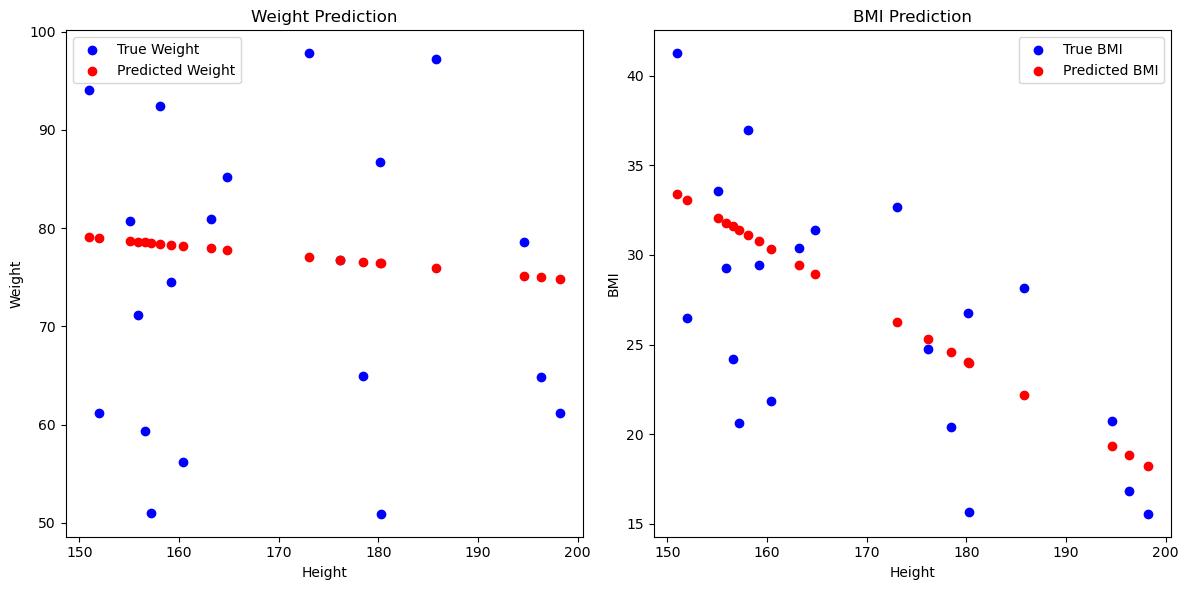

In [5]:
from sklearn.preprocessing import LabelEncoder

# Phân loại BMI thành các nhóm
bmi_labels = pd.cut(bmi, bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])
label_encoder = LabelEncoder()
y_bmi_class = label_encoder.fit_transform(bmi_labels)

X_train_class, X_test_class, y_bmi_class_train, y_bmi_class_test = train_test_split(X, y_bmi_class, test_size=0.2, random_state=0)

# Mô hình Logistic Regression
log_reg_bmi = LogisticRegression()
log_reg_bmi.fit(X_train_class, y_bmi_class_train)
bmi_class_predictions = log_reg_bmi.predict(X_test_class)

# Đánh giá mô hình Logistic Regression
accuracy = accuracy_score(y_bmi_class_test, bmi_class_predictions)
print(f"Accuracy for BMI Classification: {accuracy:.2f}")

# Vẽ biểu đồ so sánh (dành cho Logistic Regression)
fpr, tpr, _ = roc_curve(y_bmi_class_test, log_reg_bmi.predict_proba(X_test_class)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy for BMI Classification: 0.50


ValueError: multiclass format is not supported